# Data Description

Give a brief description of the dataset you are using:

I am using a dataset that is about cars and MPG with some specs.

In [1]:
import pandas as pd

results = pd.read_csv("auto-mpg.csv")
results

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,carname
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


---

# Dialogue Model Training

Train the RASA dialogue model using your training data and the code from the lab notebook. Feel free to add code/markdown cells as needed.

In [2]:
%matplotlib inline

import logging, io, json, warnings
logging.basicConfig(level="INFO")
warnings.filterwarnings('ignore')

import sys
!{sys.executable} -m spacy download en

def pprint(o):
    # small helper to make dict dumps a bit prettier
    print(json.dumps(o, indent=2))


    Linking successful
    C:\Anaconda\envs\mie451-assignment-ci\lib\site-packages\en_core_web_sm
    -->
    C:\Anaconda\envs\mie451-assignment-ci\lib\site-packages\spacy\data\en

    You can now load the model via spacy.load('en')



C:\Anaconda\envs\mie451-assignment-ci\lib\importlib\_bootstrap.py:219: RuntimeWarning: cymem.cymem.Pool size changed, may indicate binary incompatibility. Expected 48 from C header, got 64 from PyObject
  return f(*args, **kwds)
C:\Anaconda\envs\mie451-assignment-ci\lib\importlib\_bootstrap.py:219: RuntimeWarning: cymem.cymem.Address size changed, may indicate binary incompatibility. Expected 24 from C header, got 40 from PyObject
  return f(*args, **kwds)


In [3]:
from rasa_nlu.training_data import load_data
from rasa_nlu.model import Trainer
from rasa_nlu import config

# loading the nlu training samples
training_data = load_data("nlu_data/intents.md")

# trainer to educate our pipeline
trainer = Trainer(config.load("config.yml"))

# train the model!
interpreter = trainer.train(training_data, verbose=True)

# store it for future use
model_directory = trainer.persist("models/nlu", fixed_model_name="current")

INFO:rasa_nlu.training_data.loading:Training data format of nlu_data/intents.md is md
INFO:rasa_nlu.training_data.training_data:Training data stats: 
	- intent examples: 69 (9 distinct intents)
	- Found intents: 'affirm', 'goodbye', 'mpg_check', 'average_weight', 'deny', 'inform', 'greet', 'thanks', 'fastest'
	- entity examples: 17 (3 distinct entities)
	- found entities: 'cylinder', 'car', 'year'

INFO:rasa_nlu.utils.spacy_utils:Trying to load spacy model with name 'en'
INFO:rasa_nlu.components:Added 'nlp_spacy' to component cache. Key 'nlp_spacy-en'.
INFO:rasa_nlu.model:Starting to train component nlp_spacy
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Starting to train component tokenizer_spacy
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Starting to train component intent_featurizer_spacy
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Starting to train component intent_entity_featurizer_regex
INFO:rasa_nlu.model:F

Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.1s finished
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Successfully saved model into 'c:\mie451\assignment-cai-samxf1995\assignment\models\nlu\default\current'


INFO:rasa_nlu.components:Added 'nlp_spacy' to component cache. Key 'nlp_spacy-en'.
INFO:rasa_nlu.training_data.loading:Training data format of nlu_data/intents.md is md
INFO:rasa_nlu.training_data.training_data:Training data stats: 
	- intent examples: 69 (9 distinct intents)
	- Found intents: 'affirm', 'goodbye', 'mpg_check', 'average_weight', 'deny', 'inform', 'greet', 'thanks', 'fastest'
	- entity examples: 17 (3 distinct entities)
	- found entities: 'cylinder', 'car', 'year'

INFO:rasa_nlu.evaluate:Intent evaluation results:
INFO:rasa_nlu.evaluate:Intent Evaluation: Only considering those 69 examples that have a defined intent out of 69 examples
INFO:rasa_nlu.evaluate:F1-Score:  0.9854820415879019
INFO:rasa_nlu.evaluate:Precision: 0.9866220735785953
INFO:rasa_nlu.evaluate:Accuracy:  0.9855072463768116
INFO:rasa_nlu.evaluate:Classification report: 
                precision    recall  f1-score   support

        affirm       1.00      1.00      1.00         9
average_weight       1.

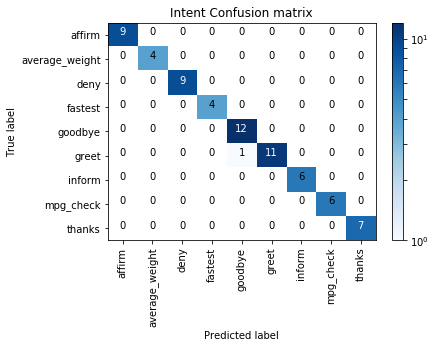

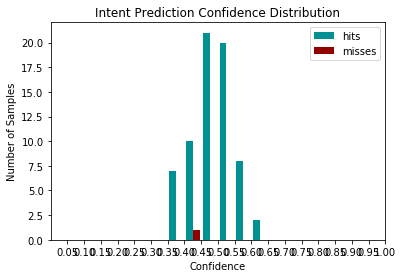

INFO:rasa_nlu.evaluate:Entity evaluation results:
INFO:rasa_nlu.evaluate:Evaluation for entity extractor: ner_crf 
INFO:rasa_nlu.evaluate:F1-Score:  1.0
INFO:rasa_nlu.evaluate:Precision: 1.0
INFO:rasa_nlu.evaluate:Accuracy:  1.0
INFO:rasa_nlu.evaluate:Classification report: 
             precision    recall  f1-score   support

        car       1.00      1.00      1.00        17
   cylinder       1.00      1.00      1.00         5
  no_entity       1.00      1.00      1.00       206
       year       1.00      1.00      1.00         7

avg / total       1.00      1.00      1.00       235



In [4]:
from rasa_nlu.evaluate import run_evaluation

run_evaluation("nlu_data/intents.md", model_directory)

In [5]:
while True:
    q = input()
    parsed_query = interpreter.parse(q)
    parsed_intent = parsed_query.get('intent')
    parsed_entities = parsed_query.get('entities')
    
    print("Intent:"), pprint(parsed_intent)
    print("Entities:"), pprint(parsed_entities)
    if q == 'stop':
        break

stop
Intent:
{
  "name": "greet",
  "confidence": 0.35942294477172215
}
Entities:
[]


In [27]:
from rasa_core.policies import KerasPolicy, MemoizationPolicy
from rasa_core.policies.fallback import FallbackPolicy
from rasa_core.policies.keras_policy import KerasPolicy
from rasa_core.agent import Agent

fallback = FallbackPolicy(fallback_action_name="action_default_fallback",
                          core_threshold=0.3,
                          nlu_threshold=0.3)

agent = Agent('domain.yml', policies=[MemoizationPolicy(), KerasPolicy(), fallback])

# loading our training dialogues
training_data = agent.load_data('nlu_data/stories.md')

agent.train(
    training_data,
    validation_split=0.0,
    epochs=200
)

agent.persist('models/dialogue')

Processed Story Blocks: 100%|█████████████████████████████████████████████| 9/9 [00:00<00:00, 54.88it/s, # trackers=13]
Processed actions: 519it [00:03, 150.68it/s, # examples=519]


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking (Masking)            (None, 5, 30)             0         
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8064      
_________________________________________________________________
dense (Dense)                (None, 15)                495       
_________________________________________________________________
activation (Activation)      (None, 15)                0         
Total params: 8,559
Trainable params: 8,559
Non-trainable params: 0
_________________________________________________________________


INFO:rasa_core.policies.keras_policy:Fitting model with 519 total samples and a validation split of 0.0


Epoch 1/200
519/519 [==============================] - ETA: 12s - loss: 2.6520 - acc: 0.15 - ETA: 1s - loss: 2.5631 - acc: 0.3250 - ETA: 0s - loss: 2.5146 - acc: 0.375 - ETA: 0s - loss: 2.4770 - acc: 0.389 - 1s 2ms/step - loss: 2.4502 - acc: 0.3911
Epoch 2/200
519/519 [==============================] - ETA: 0s - loss: 2.3478 - acc: 0.437 - ETA: 0s - loss: 2.2327 - acc: 0.432 - ETA: 0s - loss: 2.2212 - acc: 0.431 - ETA: 0s - loss: 2.2049 - acc: 0.427 - 0s 466us/step - loss: 2.1814 - acc: 0.4316
Epoch 3/200
519/519 [==============================] - ETA: 0s - loss: 1.9615 - acc: 0.468 - ETA: 0s - loss: 2.1160 - acc: 0.367 - ETA: 0s - loss: 2.0622 - acc: 0.415 - ETA: 0s - loss: 2.0300 - acc: 0.431 - ETA: 0s - loss: 2.0165 - acc: 0.430 - 0s 538us/step - loss: 2.0102 - acc: 0.4335
Epoch 4/200
519/519 [==============================] - ETA: 0s - loss: 1.9010 - acc: 0.468 - ETA: 0s - loss: 1.8816 - acc: 0.468 - ETA: 0s - loss: 1.9255 - acc: 0.451 - ETA: 0s - loss: 1.9237 - acc: 0.437 - 0s 457

Epoch 29/200
519/519 [==============================] - ETA: 0s - loss: 0.5801 - acc: 0.843 - ETA: 0s - loss: 0.5904 - acc: 0.900 - ETA: 0s - loss: 0.5622 - acc: 0.910 - ETA: 0s - loss: 0.5618 - acc: 0.900 - ETA: 0s - loss: 0.5397 - acc: 0.911 - ETA: 0s - loss: 0.5386 - acc: 0.910 - 0s 719us/step - loss: 0.5360 - acc: 0.9114
Epoch 30/200
519/519 [==============================] - ETA: 0s - loss: 0.4609 - acc: 0.875 - ETA: 0s - loss: 0.5170 - acc: 0.895 - ETA: 0s - loss: 0.5023 - acc: 0.901 - ETA: 0s - loss: 0.5578 - acc: 0.887 - ETA: 0s - loss: 0.5494 - acc: 0.896 - ETA: 0s - loss: 0.5442 - acc: 0.897 - 0s 692us/step - loss: 0.5340 - acc: 0.9056
Epoch 31/200
519/519 [==============================] - ETA: 0s - loss: 0.4447 - acc: 0.937 - ETA: 0s - loss: 0.4488 - acc: 0.968 - ETA: 0s - loss: 0.4807 - acc: 0.953 - ETA: 0s - loss: 0.4852 - acc: 0.943 - ETA: 0s - loss: 0.5084 - acc: 0.926 - 0s 588us/step - loss: 0.4992 - acc: 0.9306
Epoch 32/200
519/519 [==============================] - E

519/519 [==============================] - ETA: 0s - loss: 0.2218 - acc: 1.000 - ETA: 0s - loss: 0.1564 - acc: 0.989 - ETA: 0s - loss: 0.2012 - acc: 0.974 - ETA: 0s - loss: 0.2080 - acc: 0.971 - ETA: 0s - loss: 0.1981 - acc: 0.976 - 0s 605us/step - loss: 0.1852 - acc: 0.9769
Epoch 57/200
519/519 [==============================] - ETA: 0s - loss: 0.1318 - acc: 0.968 - ETA: 0s - loss: 0.1337 - acc: 0.975 - ETA: 0s - loss: 0.1486 - acc: 0.979 - ETA: 0s - loss: 0.1867 - acc: 0.961 - ETA: 0s - loss: 0.1962 - acc: 0.956 - ETA: 0s - loss: 0.1902 - acc: 0.960 - 0s 655us/step - loss: 0.1889 - acc: 0.9615
Epoch 58/200
519/519 [==============================] - ETA: 0s - loss: 0.1174 - acc: 1.000 - ETA: 0s - loss: 0.1931 - acc: 0.968 - ETA: 0s - loss: 0.2068 - acc: 0.959 - ETA: 0s - loss: 0.2049 - acc: 0.962 - ETA: 0s - loss: 0.2106 - acc: 0.959 - ETA: 0s - loss: 0.2068 - acc: 0.962 - 0s 615us/step - loss: 0.2056 - acc: 0.9634
Epoch 59/200
519/519 [==============================] - ETA: 0s - loss

519/519 [==============================] - ETA: 0s - loss: 0.1154 - acc: 0.968 - ETA: 0s - loss: 0.1010 - acc: 0.976 - ETA: 0s - loss: 0.0964 - acc: 0.977 - ETA: 0s - loss: 0.0945 - acc: 0.979 - ETA: 0s - loss: 0.1027 - acc: 0.978 - ETA: 0s - loss: 0.1038 - acc: 0.980 - 0s 609us/step - loss: 0.1034 - acc: 0.9807
Epoch 85/200
519/519 [==============================] - ETA: 0s - loss: 0.1295 - acc: 1.000 - ETA: 0s - loss: 0.1201 - acc: 0.979 - ETA: 0s - loss: 0.1166 - acc: 0.973 - ETA: 0s - loss: 0.1046 - acc: 0.980 - ETA: 0s - loss: 0.0908 - acc: 0.983 - 0s 615us/step - loss: 0.0980 - acc: 0.9788
Epoch 86/200
519/519 [==============================] - ETA: 0s - loss: 0.1315 - acc: 0.937 - ETA: 0s - loss: 0.1134 - acc: 0.968 - ETA: 0s - loss: 0.1183 - acc: 0.963 - ETA: 0s - loss: 0.1147 - acc: 0.968 - ETA: 0s - loss: 0.1177 - acc: 0.963 - ETA: 0s - loss: 0.1184 - acc: 0.966 - ETA: 0s - loss: 0.1132 - acc: 0.968 - 0s 719us/step - loss: 0.1129 - acc: 0.9692
Epoch 87/200
519/519 [==========

519/519 [==============================] - ETA: 0s - loss: 0.1538 - acc: 0.937 - ETA: 0s - loss: 0.0826 - acc: 0.989 - ETA: 0s - loss: 0.0763 - acc: 0.989 - ETA: 0s - loss: 0.0790 - acc: 0.982 - 0s 422us/step - loss: 0.0729 - acc: 0.9846
Epoch 111/200
519/519 [==============================] - ETA: 0s - loss: 0.0612 - acc: 0.968 - ETA: 0s - loss: 0.0623 - acc: 0.979 - ETA: 0s - loss: 0.0690 - acc: 0.983 - ETA: 0s - loss: 0.0779 - acc: 0.980 - 0s 407us/step - loss: 0.0769 - acc: 0.9807
Epoch 112/200
519/519 [==============================] - ETA: 0s - loss: 0.0982 - acc: 0.968 - ETA: 0s - loss: 0.0767 - acc: 0.987 - ETA: 0s - loss: 0.0653 - acc: 0.993 - ETA: 0s - loss: 0.0560 - acc: 0.992 - 0s 505us/step - loss: 0.0593 - acc: 0.9884
Epoch 113/200
519/519 [==============================] - ETA: 0s - loss: 0.0251 - acc: 1.000 - ETA: 0s - loss: 0.0660 - acc: 0.986 - ETA: 0s - loss: 0.0567 - acc: 0.987 - 0s 339us/step - loss: 0.0519 - acc: 0.9904
Epoch 114/200
519/519 [=====================

Epoch 138/200
519/519 [==============================] - ETA: 0s - loss: 0.0890 - acc: 0.968 - ETA: 0s - loss: 0.0653 - acc: 0.968 - ETA: 0s - loss: 0.0397 - acc: 0.984 - ETA: 0s - loss: 0.0379 - acc: 0.989 - ETA: 0s - loss: 0.0344 - acc: 0.992 - ETA: 0s - loss: 0.0392 - acc: 0.990 - ETA: 0s - loss: 0.0390 - acc: 0.990 - 0s 723us/step - loss: 0.0385 - acc: 0.9904
Epoch 139/200
519/519 [==============================] - ETA: 0s - loss: 0.0707 - acc: 1.000 - ETA: 0s - loss: 0.0331 - acc: 1.000 - ETA: 0s - loss: 0.0318 - acc: 1.000 - ETA: 0s - loss: 0.0356 - acc: 0.997 - ETA: 0s - loss: 0.0360 - acc: 0.997 - ETA: 0s - loss: 0.0353 - acc: 0.998 - 0s 603us/step - loss: 0.0349 - acc: 0.9981
Epoch 140/200
519/519 [==============================] - ETA: 0s - loss: 0.0147 - acc: 1.000 - ETA: 0s - loss: 0.0653 - acc: 0.975 - ETA: 0s - loss: 0.0680 - acc: 0.979 - ETA: 0s - loss: 0.0594 - acc: 0.983 - ETA: 0s - loss: 0.0547 - acc: 0.986 - 0s 536us/step - loss: 0.0540 - acc: 0.9865
Epoch 141/200
51

519/519 [==============================] - ETA: 0s - loss: 0.0613 - acc: 0.968 - ETA: 0s - loss: 0.0378 - acc: 0.984 - ETA: 0s - loss: 0.0407 - acc: 0.984 - ETA: 0s - loss: 0.0335 - acc: 0.989 - ETA: 0s - loss: 0.0351 - acc: 0.988 - ETA: 0s - loss: 0.0383 - acc: 0.985 - 0s 651us/step - loss: 0.0399 - acc: 0.9846
Epoch 165/200
519/519 [==============================] - ETA: 0s - loss: 0.0431 - acc: 1.000 - ETA: 0s - loss: 0.0323 - acc: 1.000 - ETA: 0s - loss: 0.0302 - acc: 1.000 - ETA: 0s - loss: 0.0362 - acc: 0.988 - ETA: 0s - loss: 0.0380 - acc: 0.989 - ETA: 0s - loss: 0.0351 - acc: 0.992 - ETA: 0s - loss: 0.0384 - acc: 0.993 - 0s 746us/step - loss: 0.0407 - acc: 0.9923
Epoch 166/200
519/519 [==============================] - ETA: 0s - loss: 0.0062 - acc: 1.000 - ETA: 0s - loss: 0.0180 - acc: 1.000 - ETA: 0s - loss: 0.0232 - acc: 0.996 - ETA: 0s - loss: 0.0233 - acc: 0.994 - ETA: 0s - loss: 0.0235 - acc: 0.994 - ETA: 0s - loss: 0.0278 - acc: 0.993 - 0s 644us/step - loss: 0.0298 - acc:

519/519 [==============================] - ETA: 0s - loss: 0.0263 - acc: 1.000 - ETA: 0s - loss: 0.0388 - acc: 0.989 - ETA: 0s - loss: 0.0337 - acc: 0.989 - ETA: 0s - loss: 0.0343 - acc: 0.989 - ETA: 0s - loss: 0.0350 - acc: 0.986 - ETA: 0s - loss: 0.0361 - acc: 0.984 - 0s 624us/step - loss: 0.0357 - acc: 0.9846
Epoch 192/200
519/519 [==============================] - ETA: 0s - loss: 0.0027 - acc: 1.000 - ETA: 0s - loss: 0.0060 - acc: 1.000 - ETA: 0s - loss: 0.0158 - acc: 0.995 - ETA: 0s - loss: 0.0145 - acc: 0.996 - ETA: 0s - loss: 0.0161 - acc: 0.997 - 0s 595us/step - loss: 0.0151 - acc: 0.9981
Epoch 193/200
519/519 [==============================] - ETA: 0s - loss: 0.0094 - acc: 1.000 - ETA: 0s - loss: 0.0141 - acc: 1.000 - ETA: 0s - loss: 0.0109 - acc: 1.000 - ETA: 0s - loss: 0.0103 - acc: 1.000 - ETA: 0s - loss: 0.0201 - acc: 0.997 - ETA: 0s - loss: 0.0189 - acc: 0.997 - 0s 665us/step - loss: 0.0177 - acc: 0.9981
Epoch 194/200
519/519 [==============================] - ETA: 0s - l

INFO:rasa_core.policies.keras_policy:Done fitting keras policy model
INFO:rasa_core.agent:Model directory models/dialogue exists and contains old model files. All files will be overwritten.
INFO:rasa_core.agent:Persisted model to 'c:\mie451\assignment-cai-samxf1995\assignment\models\dialogue'


In [7]:
!type endpoint.yml

action_endpoint:
  url: "http://localhost:5055/webhook"


In [18]:
import IPython
from IPython.display import clear_output
from rasa_core.agent import Agent
from rasa_core.interpreter import NaturalLanguageInterpreter
from rasa_core.utils import EndpointConfig

messages = ["Hi! you can chat in this window. Type 'stop' to end the conversation."]
interpreter = NaturalLanguageInterpreter.create('models/nlu/default/current/')
endpoint = EndpointConfig('http://localhost:5055/webhook')
agent = Agent.load('models/dialogue', interpreter=interpreter, action_endpoint = endpoint)
tracker = agent.tracker_store.get_or_create_tracker("sender_id") 
# get current tracker state
tracker.current_state()

print("Your bot is ready to talk! Type your messages here or send 'stop'")
while True:
    a = input()
    if a == 'stop':
        break
    pprint(interpreter.parse(a))
    responses = agent.handle_text(a)
    for response in responses:
        print(response["text"])

INFO:rasa_nlu.components:Added 'nlp_spacy' to component cache. Key 'nlp_spacy-en'.


Your bot is ready to talk! Type your messages here or send 'stop'
hi
{
  "intent": {
    "name": "greet",
    "confidence": 0.5009376331335696
  },
  "entities": [],
  "intent_ranking": [
    {
      "name": "greet",
      "confidence": 0.5009376331335696
    },
    {
      "name": "affirm",
      "confidence": 0.22285242821392587
    },
    {
      "name": "goodbye",
      "confidence": 0.1217644131235098
    },
    {
      "name": "deny",
      "confidence": 0.08096626944140059
    },
    {
      "name": "thanks",
      "confidence": 0.038849854359632646
    },
    {
      "name": "inform",
      "confidence": 0.014572427464169192
    },
    {
      "name": "average_weight",
      "confidence": 0.007874475612149644
    },
    {
      "name": "mpg_check",
      "confidence": 0.006648193955028305
    },
    {
      "name": "fastest",
      "confidence": 0.005534304696613994
    }
  ],
  "text": "hi"
}
Hello!
how much fuel does datsun pl510 use?
{
  "intent": {
    "name": "mpg_check",


---
# Interaction Demo

Provide the required sections as described in the handout.

# Q1

This bot is about cars, and question 1 is a simple one slot question that can answer about gas usage of certain model of a car.  
For example, you can ask like :"waht is the the mpg of ford mustang?"

In [21]:
messages = ["Hi! you can chat in this window. Type 'stop' to end the conversation."]
interpreter = NaturalLanguageInterpreter.create('models/nlu/default/current/')
endpoint = EndpointConfig('http://localhost:5055/webhook')
agent = Agent.load('models/dialogue', interpreter=interpreter, action_endpoint = endpoint)
tracker = agent.tracker_store.get_or_create_tracker("sender_id") 
# get current tracker state
tracker.current_state()

print("Your bot is ready to talk! Type your messages here or send 'stop'")
while True:
    a = input()
    if a == 'stop':
        break
    #pprint(interpreter.parse(a))
    responses = agent.handle_text(a)
    for response in responses:
        print(response["text"])

INFO:rasa_nlu.components:Added 'nlp_spacy' to component cache. Key 'nlp_spacy-en'.


Your bot is ready to talk! Type your messages here or send 'stop'
hi
Hello!
do you know the miles per gallon of datsun pl510 ?
datsun pl510 has mpg of 27.0.
bye
No Problem
stop


# Q2

The second question is about finding the faster car in certain years. The first path is answer the question dicrectly, the second path is ask user about which year when the user didn't provide this information in the first place.

In [24]:
messages = ["Hi! you can chat in this window. Type 'stop' to end the conversation."]
interpreter = NaturalLanguageInterpreter.create('models/nlu/default/current/')
endpoint = EndpointConfig('http://localhost:5055/webhook')
agent = Agent.load('models/dialogue', interpreter=interpreter, action_endpoint = endpoint)
tracker = agent.tracker_store.get_or_create_tracker("sender_id") 
# get current tracker state
tracker.current_state()

print("Your bot is ready to talk! Type your messages here or send 'stop'")
while True:
    a = input()
    if a == 'stop':
        break
    #pprint(interpreter.parse(a))
    responses = agent.handle_text(a)
    for response in responses:
        print(response["text"])

INFO:rasa_nlu.components:Added 'nlp_spacy' to component cache. Key 'nlp_spacy-en'.


Your bot is ready to talk! Type your messages here or send 'stop'
hi
Hello!
what is the fastest car?
Which year?
today
i don't understand, please try new input
70
volkswagen 1131 deluxe sedan is the fastest car in 70.
thanks
No Problem
hi
Hello!
what is the fastest car in 80 s?
vw dasher (diesel) is the fastest car in 80.
stop


# Q3

The third part cam answer questions like the average weight of cylinders in certain years, you can see the trend of weight shifting through out years. You can see the fall back when I asked wrong information 

In [30]:
messages = ["Hi! you can chat in this window. Type 'stop' to end the conversation."]
interpreter = NaturalLanguageInterpreter.create('models/nlu/default/current/')
endpoint = EndpointConfig('http://localhost:5055/webhook')
agent = Agent.load('models/dialogue', interpreter=interpreter, action_endpoint = endpoint)
tracker = agent.tracker_store.get_or_create_tracker("sender_id") 
# get current tracker state
tracker.current_state()

print("Your bot is ready to talk! Type your messages here or send 'stop'")
while True:
    a = input()
    if a == 'stop':
        break
    #pprint(interpreter.parse(a))
    responses = agent.handle_text(a)
    for response in responses:
        print(response["text"])

INFO:rasa_nlu.components:Added 'nlp_spacy' to component cache. Key 'nlp_spacy-en'.


Your bot is ready to talk! Type your messages here or send 'stop'
hi
Hello!
what is average weight for cars ?
how many cylinders?
so many!!!
i don't understand, please try new input
6
Which year?
80
6 cylinders cars have average weight of 3145.5 lbs in 80 .
thanks
No Problem
bye
Bye!
hi
Hey!!
what is average weight for cars from 70 
how many cylinders?
8
8 cylinders cars have average weight of 3940.0555555555557 lbs in 70 .
thanks
No Problem
what is the average weight for car with 6 cylinders from 70 ?
6 cylinders cars have average weight of 2710.5 lbs in 70 .
stop
